In [4]:
import pandas as pd
import numpy as np

In [5]:
df=pd.read_csv("train.csv")
df.head(3)

,text,sentiment
0,For a movie that gets no respect there sure ar...,0
1,Bizarre horror movie filled with famous faces ...,0
2,"A solid, if unremarkable film. Matthau, as Ein...",0


In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [7]:
from nltk.corpus import stopwords
sw=set(stopwords.words("english"))

In [17]:
vector=TfidfVectorizer(use_idf=True,lowercase=True)
vector

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=None,
                min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [18]:
y=df.sentiment
y.head(2)

0    0
1    0
Name: sentiment, dtype: int64

In [19]:
X=vector.fit_transform(df.text)

In [20]:
print(X.shape)

(25000, 74849)


In [21]:
print(y.shape)

(25000,)


In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1)

In [24]:
from sklearn.naive_bayes import MultinomialNB
model112=MultinomialNB()

In [25]:
model112.fit(X_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [26]:
model112.score(X_test,y_test)

0.8612

In [27]:
model112.predict(X_test)

array([1, 0, 1, ..., 1, 0, 1], dtype=int64)

In [28]:
y_predict=model112.predict(X_test)

In [29]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_predict)
cm

array([[1025,  212],
       [ 135, 1128]], dtype=int64)

In [30]:
import seaborn as sn

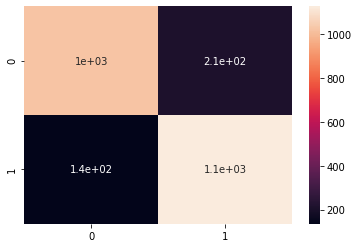

In [31]:
sn.heatmap(cm,annot=True)

In [32]:
movie_review=np.array(["films adapted from comic books have had plenty"])

In [36]:
test=vector.transform(movie_review)

In [37]:
model112.predict(test)

array([0], dtype=int64)